C:\Users\micap\AppData\Local\Temp\ipykernel_19892\808907263.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

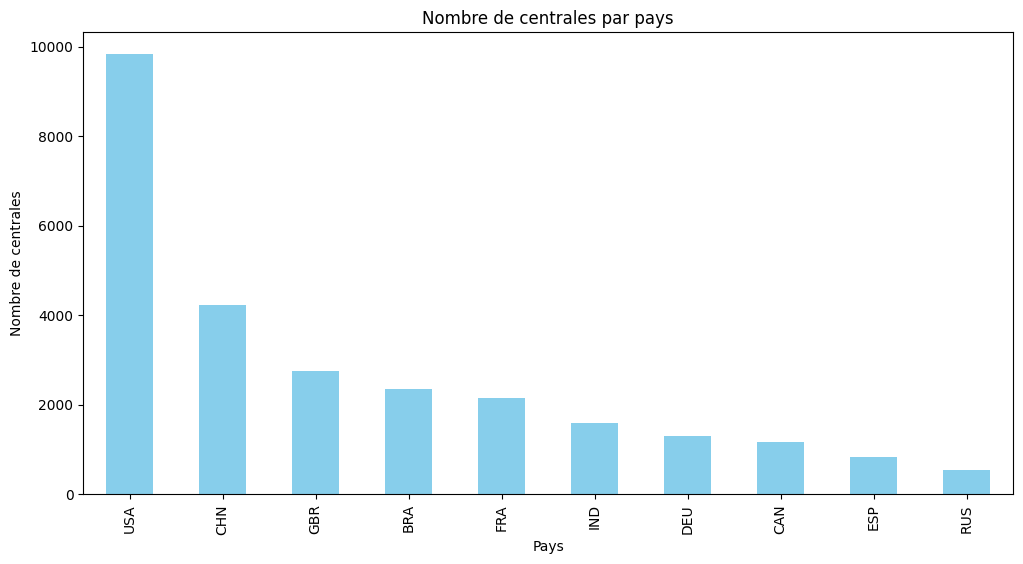

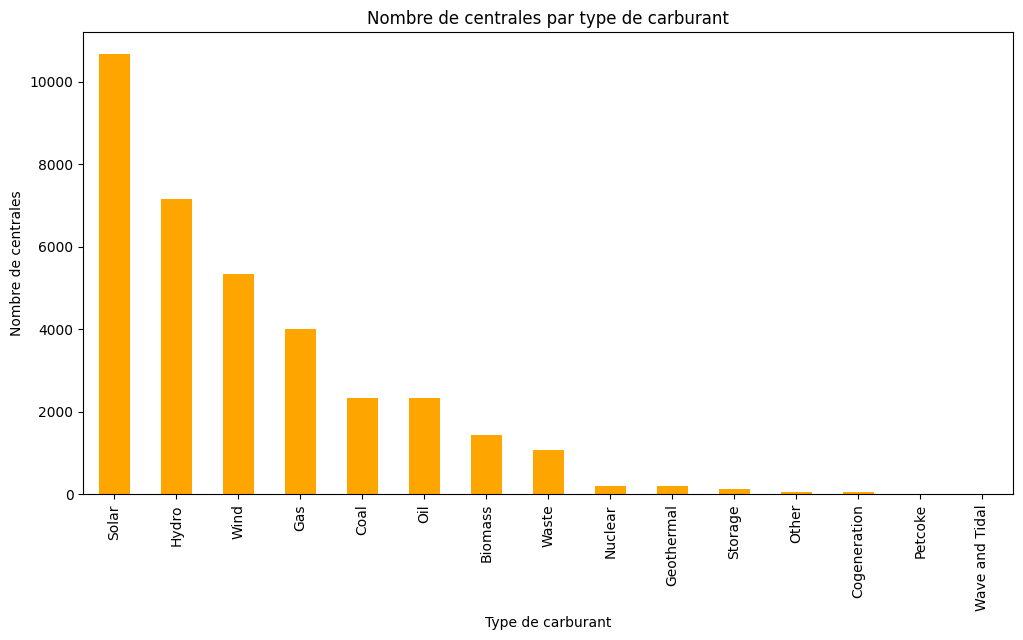

Moyenne: 163.35514790637163
Médiane: 16.744999999999997
Écart-type: 489.6360717012945
                       mean      median          std
primary_fuel                                        
Biomass           23.972938     9.45000    39.461805
Coal             843.579828   600.00000   888.187187
Cogeneration      98.731707    31.90000   283.428252
Gas              373.449375   147.50000   560.934146
Geothermal        67.130952    30.00000   114.640890
Hydro            147.171551    20.00000   549.809328
Nuclear         2091.855179  1888.00000  1303.509273
Oil              112.878754     9.00000   392.009039
Other             84.020000    40.00000   145.891392
Petcoke          202.048125    65.48875   476.986459
Solar             17.657039     5.80000    41.939412
Storage           12.683704     4.90000    35.574631
Waste             13.809657     4.80000    20.582503
Wave and Tidal    55.220000     5.00000   101.440708
Wind              49.224126    27.00000   106.138355


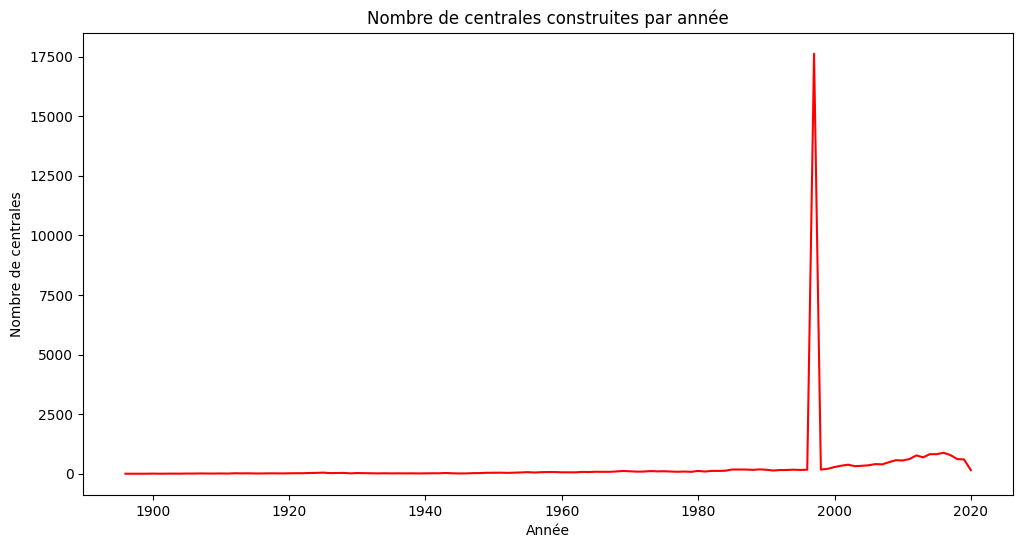

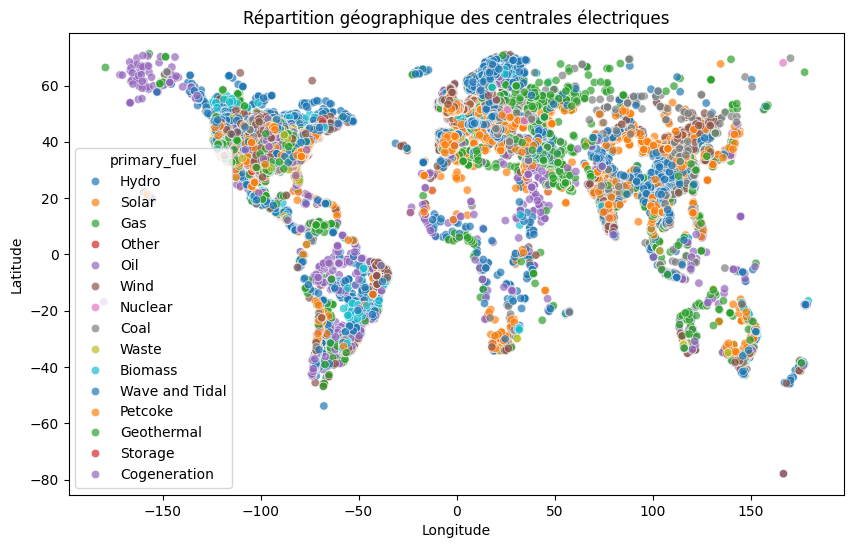

              name country  capacity_mw
10          Fierza     ALB        500.0
11           Koman     ALB        600.0
15     Vau i Dijes     ALB        250.0
19     Ain Djasser     DZA        520.0
27           Arbaa     DZA        560.0
30      Boufarik 2     DZA        450.0
31      Boutelilis     DZA        450.0
34         F'Krina     DZA        292.0
36  Hadjret Ennous     DZA       1200.0
37         Hamma 2     DZA        418.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = "global_power_plant_database.csv"
df = pd.read_csv(file_path)

# Afficher les premières lignes
print(df.head())

# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Remplacer les valeurs manquantes
df.fillna(df.mean(numeric_only=True), inplace=True)

# Analyse exploratoire
print(df.describe())

# Répartition des centrales par pays
plt.figure(figsize=(12, 6))
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Nombre de centrales par pays")
plt.xlabel("Pays")
plt.ylabel("Nombre de centrales")
plt.show()

# Répartition par type de combustible
plt.figure(figsize=(12, 6))
df['primary_fuel'].value_counts().plot(kind='bar', color='orange')
plt.title("Nombre de centrales par type de carburant")
plt.xlabel("Type de carburant")
plt.ylabel("Nombre de centrales")
plt.show()

# Analyse statistique
print("Moyenne:", df['capacity_mw'].mean())
print("Médiane:", df['capacity_mw'].median())
print("Écart-type:", df['capacity_mw'].std())

# Comparer la puissance moyenne par type de carburant
fuel_stats = df.groupby('primary_fuel')['capacity_mw'].agg(['mean', 'median', 'std'])
print(fuel_stats)

# Analyse des séries temporelles
if 'commissioning_year' in df.columns:
    plt.figure(figsize=(12, 6))
    df['commissioning_year'].dropna().astype(int).value_counts().sort_index().plot(kind='line', color='red')
    plt.title("Nombre de centrales construites par année")
    plt.xlabel("Année")
    plt.ylabel("Nombre de centrales")
    plt.show()

# Visualisation avancée
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='primary_fuel', palette='tab10', alpha=0.7)
plt.title("Répartition géographique des centrales électriques")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Intégration NumPy + Pandas + Matplotlib
high_capacity = df[df['capacity_mw'] > df['capacity_mw'].mean()]
print(high_capacity[['name', 'country', 'capacity_mw']].head(10))
